In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [4]:
svsim = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [6]:
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = svsim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


In [7]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

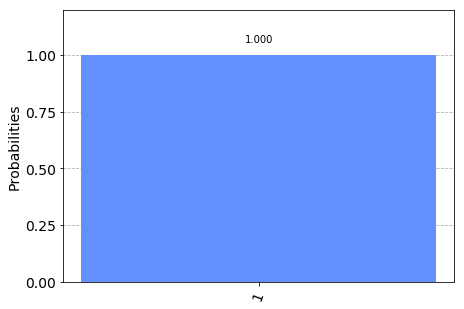

In [9]:
# now using the histogram
qobj = assemble(qc)
result = svsim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
# let's now try another state
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


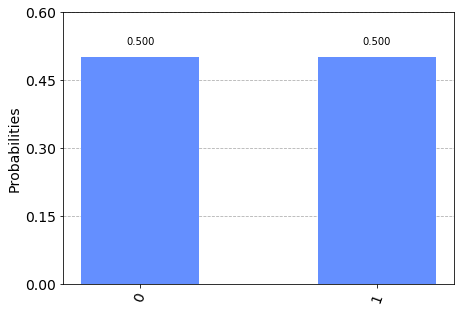

In [11]:
qobj = assemble(qc)
results = svsim.run(qobj).result().get_counts()
plot_histogram(results)


In [13]:
# how normalization is important (because of the probability)
# we shoulc expect an error here
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

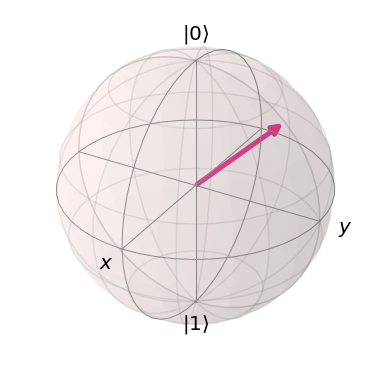

In [25]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/4,pi/2,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates